<a href="https://colab.research.google.com/github/123shwetarohokale/563-ShwetaR/blob/main/MonteCarloHomework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating L=10, T=3.0: 100%|██████████| 5000/5000 [00:23<00:00, 208.64it/s]


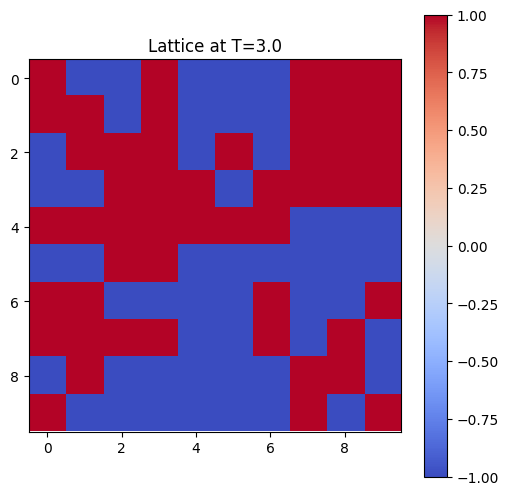

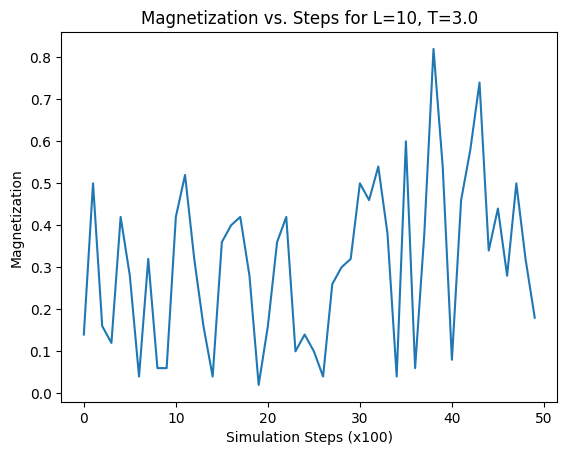

Simulating L=10, T=2.5: 100%|██████████| 5000/5000 [00:14<00:00, 346.23it/s]


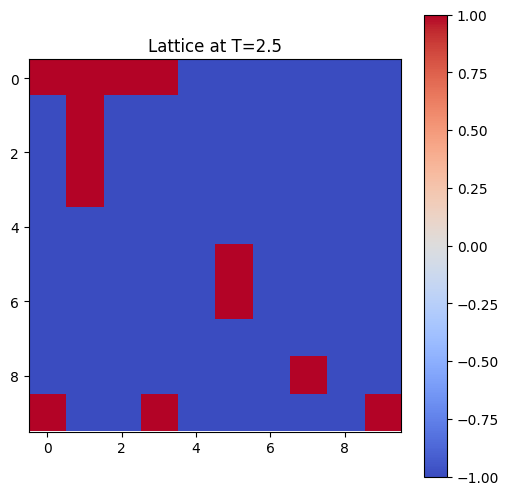

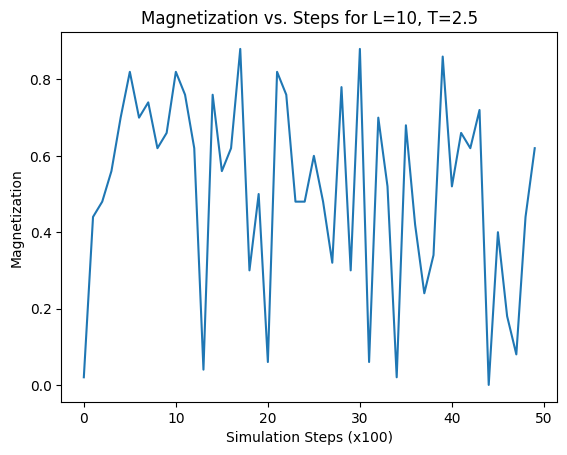

Simulating L=10, T=2.0: 100%|██████████| 5000/5000 [00:18<00:00, 274.69it/s]


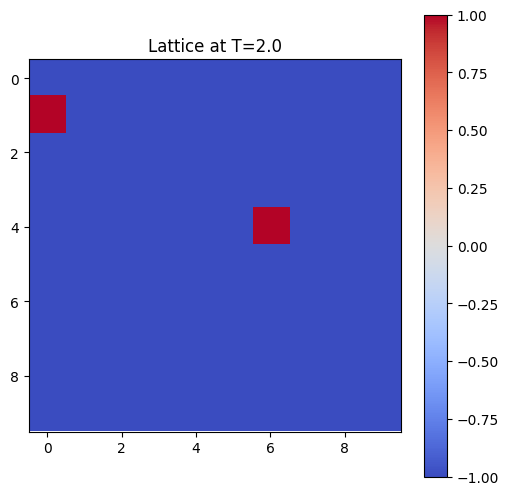

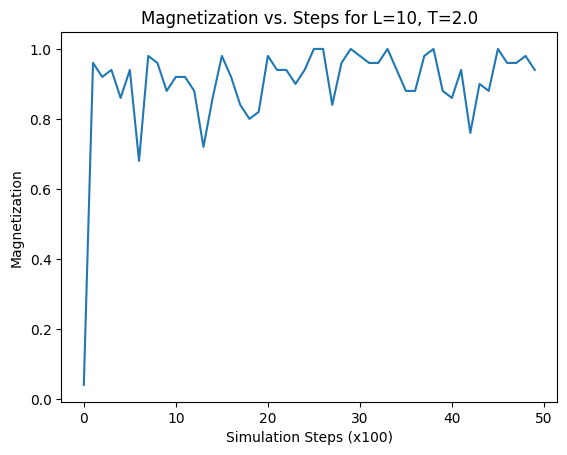

Simulating L=10, T=1.5: 100%|██████████| 5000/5000 [00:15<00:00, 326.60it/s]


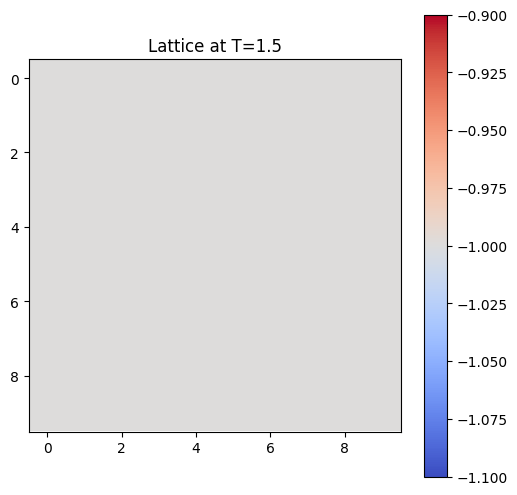

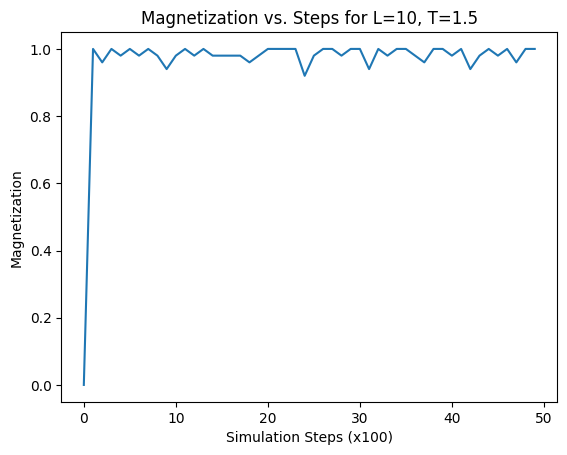

Simulating L=10, T=1.0: 100%|██████████| 5000/5000 [00:13<00:00, 375.14it/s]


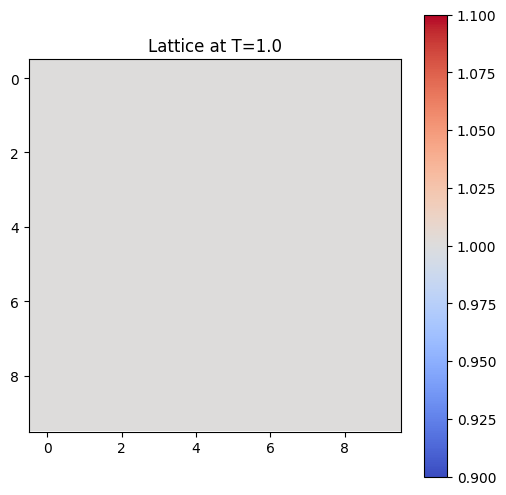

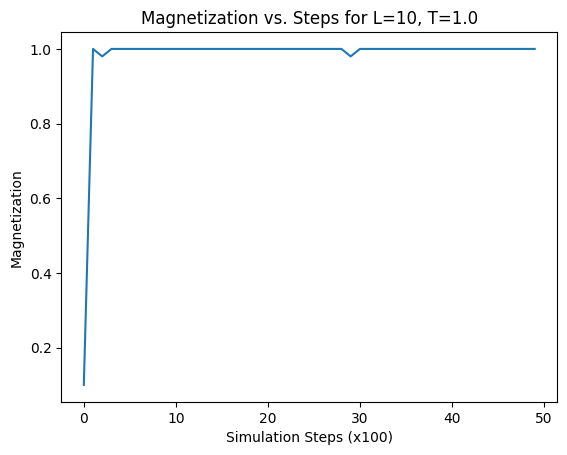

Simulating L=20, T=3.0:  88%|████████▊ | 4390/5000 [00:50<00:06, 99.28it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def initialize_lattice(L):
    """Initialize an LxL square lattice with randomly assigned spin states (+1 or -1)."""
    return np.random.choice([-1, 1], size=(L, L))

def periodic_boundary(i, L):
    """Apply periodic boundary conditions."""
    return i % L

def energy_change(lattice, i, j, L):
    """Calculate the energy change if a spin at (i, j) is flipped."""
    spin = lattice[i, j]
    neighbors = [
        lattice[periodic_boundary(i+1, L), j],
        lattice[periodic_boundary(i-1, L), j],
        lattice[i, periodic_boundary(j+1, L)],
        lattice[i, periodic_boundary(j-1, L)]
    ]
    return 2 * spin * sum(neighbors)

def metropolis_step(lattice, beta, L):
    """Perform one Metropolis step over the entire lattice."""
    for _ in range(L * L):
        i, j = np.random.randint(0, L, size=2)
        dE = energy_change(lattice, i, j, L)
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[i, j] *= -1

def magnetization(lattice):
    """Compute magnetization as an order parameter."""
    return np.abs(np.sum(lattice)) / lattice.size

def run_simulation(L, T, steps=10000):
    """Run the Monte Carlo simulation for a given system size and temperature."""
    beta = 1.0 / T  # Inverse temperature
    lattice = initialize_lattice(L)
    mag_values = []

    for _ in tqdm(range(steps), desc=f"Simulating L={L}, T={T}"):
        metropolis_step(lattice, beta, L)
        if _ % 100 == 0:
            mag_values.append(magnetization(lattice))

    return lattice, mag_values

def plot_lattice(lattice, T):
    """Visualize the final state of the lattice."""
    plt.figure(figsize=(6,6))
    plt.imshow(lattice, cmap='coolwarm', interpolation='nearest')
    plt.title(f'Lattice at T={T}')
    plt.colorbar()
    plt.show()

def main():
    """Run the simulation for different temperatures and analyze system size limits."""
    system_sizes = [10, 20, 50]  # Test different lattice sizes
    temperatures = [3.0, 2.5, 2.0, 1.5, 1.0]  # Observe clustering below a critical T

    for L in system_sizes:
        for T in temperatures:
            final_lattice, mag_values = run_simulation(L, T, steps=5000)
            plot_lattice(final_lattice, T)
            plt.plot(mag_values)
            plt.xlabel('Simulation Steps (x100)')
            plt.ylabel('Magnetization')
            plt.title(f'Magnetization vs. Steps for L={L}, T={T}')
            plt.show()

if __name__ == "__main__":
    main()
